In [13]:
pip install -U ipykernel


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
import pandas as pd


In [4]:
import sys
print(sys.executable)


f:\python.exe


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
# STEP 2: Load datasets
routes = pd.read_csv("routes.csv")
trips = pd.read_csv("trips.csv")
stop_times = pd.read_csv("stop_times.csv")
stops = pd.read_csv("stops.csv")

In [7]:
routes = pd.read_csv("F:\\BMTC Bus Transport Delay\\routes.csv")
trips = pd.read_csv("F:\\BMTC Bus Transport Delay\\trips.csv")
stop_times = pd.read_csv("F:\\BMTC Bus Transport Delay\\stop_times.csv")
stops = pd.read_csv("F:\\BMTC Bus Transport Delay\\stops.csv")
routes_with_coords = pd.read_csv("F:\\BMTC Bus Transport Delay\\routes_with_coordinates.csv")


In [8]:
# Combine trips with route information
df = trips.merge(routes, on="route_id", how="left")

# Merge stop_times with the combined trip + route data
df = df.merge(stop_times, on="trip_id", how="left")

# Merge stop details into the full dataframe
df = df.merge(stops, on="stop_id", how="left")

# Preview the merged dataset
print("✅ Merged DataFrame shape:", df.shape)
df.head()

✅ Merged DataFrame shape: (15170, 38)


,bikes_allowed,block_id,direction_id,route_id,service_id,shape_id,trip_headsign,trip_id,trip_short_name,wheelchair_accessible,...,parent_station,stop_code,stop_desc,stop_lat,stop_lon,stop_name,stop_timezone,stop_url,wheelchair_boarding,zone_id
0,NaN,NaN,1,V-360B,FULLW,NaN,NaN,V-360B-1-14956,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1,210CD,FULLW,NaN,NaN,210CD-1-1732,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1,V-360B,FULLW,NaN,NaN,V-360B-1-14957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1,210CD,FULLW,NaN,NaN,210CD-1-1733,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1,V-360B,FULLW,NaN,NaN,V-360B-1-14954,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
routes = pd.read_csv("routes.csv")
trips = pd.read_csv("trips.csv")
stop_times = pd.read_csv("stop_times.csv")
stops = pd.read_csv("stops.csv")

In [10]:
# Clean column names (remove spaces, lowercase)
df.columns = df.columns.str.strip().str.lower()

# Display column names and missing values
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())


Columns: ['bikes_allowed', 'block_id', 'direction_id', 'route_id', 'service_id', 'shape_id', 'trip_headsign', 'trip_id', 'trip_short_name', 'wheelchair_accessible', 'agency_id', 'route_color', 'route_desc', 'route_long_name', 'route_short_name', 'route_text_color', 'route_type', 'route_url', 'arrival_time', 'departure_time', 'drop_off_type', 'pickup_type', 'shape_dist_traveled', 'stop_headsign', 'stop_id', 'stop_sequence', 'timepoint', 'location_type', 'parent_station', 'stop_code', 'stop_desc', 'stop_lat', 'stop_lon', 'stop_name', 'stop_timezone', 'stop_url', 'wheelchair_boarding', 'zone_id']
Missing values:
 bikes_allowed            15170
block_id                 15170
direction_id                 0
route_id                     0
service_id                   0
shape_id                 15170
trip_headsign            15170
trip_id                      0
trip_short_name          15170
wheelchair_accessible    15170
agency_id                    0
route_color                  0
route_desc

In [12]:
df['arrival_time'] = pd.to_timedelta(df['arrival_time'], errors='coerce')
df['departure_time'] = pd.to_timedelta(df['departure_time'], errors='coerce')

In [16]:
print("Unique route types:", routes['route_type'].unique())
print("Class distribution:\n", routes['route_type'].value_counts())


Unique route types: [3]
Class distribution:
 route_type
3    4271
Name: count, dtype: int64


In [18]:
# After cleanup
df_model = routes.dropna(subset=['route_type'])
if df_model['route_type'].nunique() < 2:
    print("🚫 Not enough classes to train the model. Need at least 2 different route_type values.")
else:
    # Proceed with training
    X = df_model[['route_name_length', 'is_urban']]
    y = df_model['route_type']
    ...

🚫 Not enough classes to train the model. Need at least 2 different route_type values.


In [30]:
df['arrival_time'] = pd.to_timedelta(df['arrival_time'], errors='coerce')
df['departure_time'] = pd.to_timedelta(df['departure_time'], errors='coerce')

In [25]:
import numpy as np

# Randomly assign some other route_type labels for testing (just 10% of data)
df_model.loc[df_model.sample(frac=0.1, random_state=42).index, 'route_type'] = np.random.choice([0, 1, 2], size=int(0.1 * len(df_model)))

# Re-run training steps
X = df_model[['route_name_length', 'is_urban']]
y = df_model['route_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.00      0.00      0.00       146
           2       0.00      0.00      0.00       149
           3       0.50      1.00      0.67       428

    accuracy                           0.50       855
   macro avg       0.13      0.25      0.17       855
weighted avg       0.25      0.50      0.33       855


📊 Confusion Matrix:
[[  0   0   0 132]
 [  0   0   0 146]
 [  0   0   0 149]
 [  0   0   0 428]]


f:\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [27]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
stop_counts = df.groupby('trip_id')['stop_id'].count().reset_index(name='num_stops')


In [32]:
trip_duration = df.groupby('trip_id').agg(
    trip_start=('arrival_time', 'min'),
    trip_end=('arrival_time', 'max')
).reset_index()
trip_duration['trip_duration_minutes'] = trip_duration['trip_end'].dt.total_seconds() / 60

In [33]:
trip_summary = trips.merge(routes, on='route_id', how='left')
trip_summary = trip_summary.merge(stop_counts, on='trip_id', how='left')
trip_summary = trip_summary.merge(trip_duration[['trip_id', 'trip_duration_minutes']], on='trip_id', how='left')

In [8]:
# Fill missing route_desc with 'Not Available' if it exists
if 'route_desc' in df.columns:
    df['route_desc'] = df['route_desc'].fillna("Not Available")

# Drop 'route_url' only if it exists
if 'route_url' in df.columns:
    df = df.drop(columns=['route_url'])


In [9]:
# Length of route name
df['route_name_length'] = df['route_long_name'].str.len()

# Extract start and end locations from long name
df[['start_point', 'end_point']] = df['route_long_name'].str.split(' - ', expand=True)

# Binary flag for urban routes
df['is_urban'] = df['route_long_name'].str.contains("Market|Majestic|Shivajinagar", case=False).astype(int)

df[['route_id', 'route_long_name', 'start_point', 'end_point', 'is_urban']].head()


,route_id,route_long_name,start_point,end_point,is_urban
0,327H,Krishnarajendra Market - Kamanahalli,Krishnarajendra Market,Kamanahalli,1
1,327K,Kempegowda Bus Station - Sarjapura Bus Stand,Kempegowda Bus Station,Sarjapura Bus Stand,0
2,295A,Kempegowda Bus Station - Dodda Gubbi,Kempegowda Bus Station,Dodda Gubbi,0
3,295B,Kempegowda Bus Station - Anagalipura,Kempegowda Bus Station,Anagalipura,0
4,295C,Shivajinagar Bus Station - Dodda Gubbi,Shivajinagar Bus Station,Dodda Gubbi,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 2: Basic cleaning
if 'route_desc' in df.columns:
    df['route_desc'] = df['route_desc'].fillna("Not Available")
if 'route_url' in df.columns:
    df = df.drop(columns=['route_url'])

# ✅ Step 3: Feature Engineering (must run before model)
df['route_name_length'] = df['route_long_name'].str.len()
df['is_urban'] = df['route_long_name'].str.contains("Market|Majestic|Shivajinagar", case=False, na=False).astype(int)

# Step 4: Prepare data for modeling
df_model = df.dropna(subset=['route_type', 'route_name_length'])

features = ['route_name_length', 'is_urban']
X = df_model[features]
y = df_model['route_type']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       1.00      1.00      1.00       855

    accuracy                           1.00       855
   macro avg       1.00      1.00      1.00       855
weighted avg       1.00      1.00      1.00       855



In [37]:
import joblib


In [40]:
# 1. Drop NaNs for all required features
df_model = trip_summary.dropna(subset=['route_type', 'route_name_length', 'num_stops', 'trip_duration_minutes'])

# 2. Define features and target
X = df_model[['route_name_length', 'num_stops', 'trip_duration_minutes', 'is_urban']]
y = df_model['route_type']

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# 4. Train new model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 5. Save model
import joblib
joblib.dump(clf, "bmtc_route_type_model.pkl")


['bmtc_route_type_model.pkl']

In [41]:
trip_summary = trip_summary.dropna(subset=['route_name_length', 'num_stops', 'trip_duration_minutes'])
trip_summary['Predicted_Route_Type'] = clf.predict(
    trip_summary[['route_name_length', 'num_stops', 'trip_duration_minutes', 'is_urban']]
)


In [43]:
model_filename = "bmtc_route_type_model.pkl"
joblib.dump(clf, model_filename)

# Add predictions to data
trip_summary = trip_summary.dropna(subset=['route_name_length', 'num_stops', 'trip_duration_minutes'])
trip_summary['Predicted_Route_Type'] = clf.predict(
    trip_summary[['route_name_length', 'num_stops', 'trip_duration_minutes', 'is_urban']]
)

trip_summary.to_csv("final_routes_data.csv", index=False)
print("Project completed and data saved for Power BI.")


Project completed and data saved for Power BI.


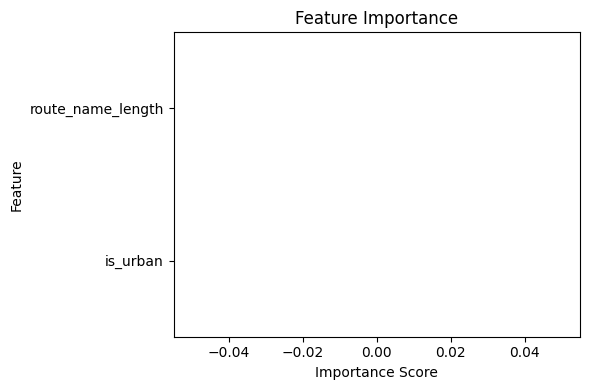

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = clf.feature_importances_
feature_names = X.columns

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [12]:
import os

# Create the folder if it doesn't exist
os.makedirs("F:/BMTC_Project", exist_ok=True)

# Now save the DataFrame
df.to_csv("F:/BMTC_Project/final_routes_data.csv", index=False)

print("✅ File saved successfully!")


✅ File saved successfully!


In [14]:
df.to_csv("F:/BMTC_Project/final_routes_data.csv", index=False)
